# 311 Volume of Top 5 request types

Prepared by Richard Buehling

In this question, we will explore the call volume of the top 5 types of requests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats

### Read and Clean Data


In [3]:
df = pd.read_csv('../../data/data_total2.csv', low_memory=False)

In [15]:
#Making new DF with only the type of requests and associated open dates
dftype = df[['type', 'open_dt']].copy()

dftype['open_dt'] = pd.to_datetime(dftype['open_dt'])

# Extract the year from the 'open_dt' column
dftype['year'] = dftype['open_dt'].dt.year

#Printing new DF
dftype.head(5)


,type,open_dt,year
0,Street Light Outages,2011-06-30 21:32:33,2011
1,Schedule a Bulk Item Pickup,2011-06-30 22:18:31,2011
2,New Sign Crosswalk or Pavement Marking,2011-06-30 22:28:04,2011
3,Street Light Outages,2011-06-30 23:03:48,2011
4,Highway Maintenance,2011-06-30 23:12:31,2011


### Find top 5 most common types per year along with their counts and plot

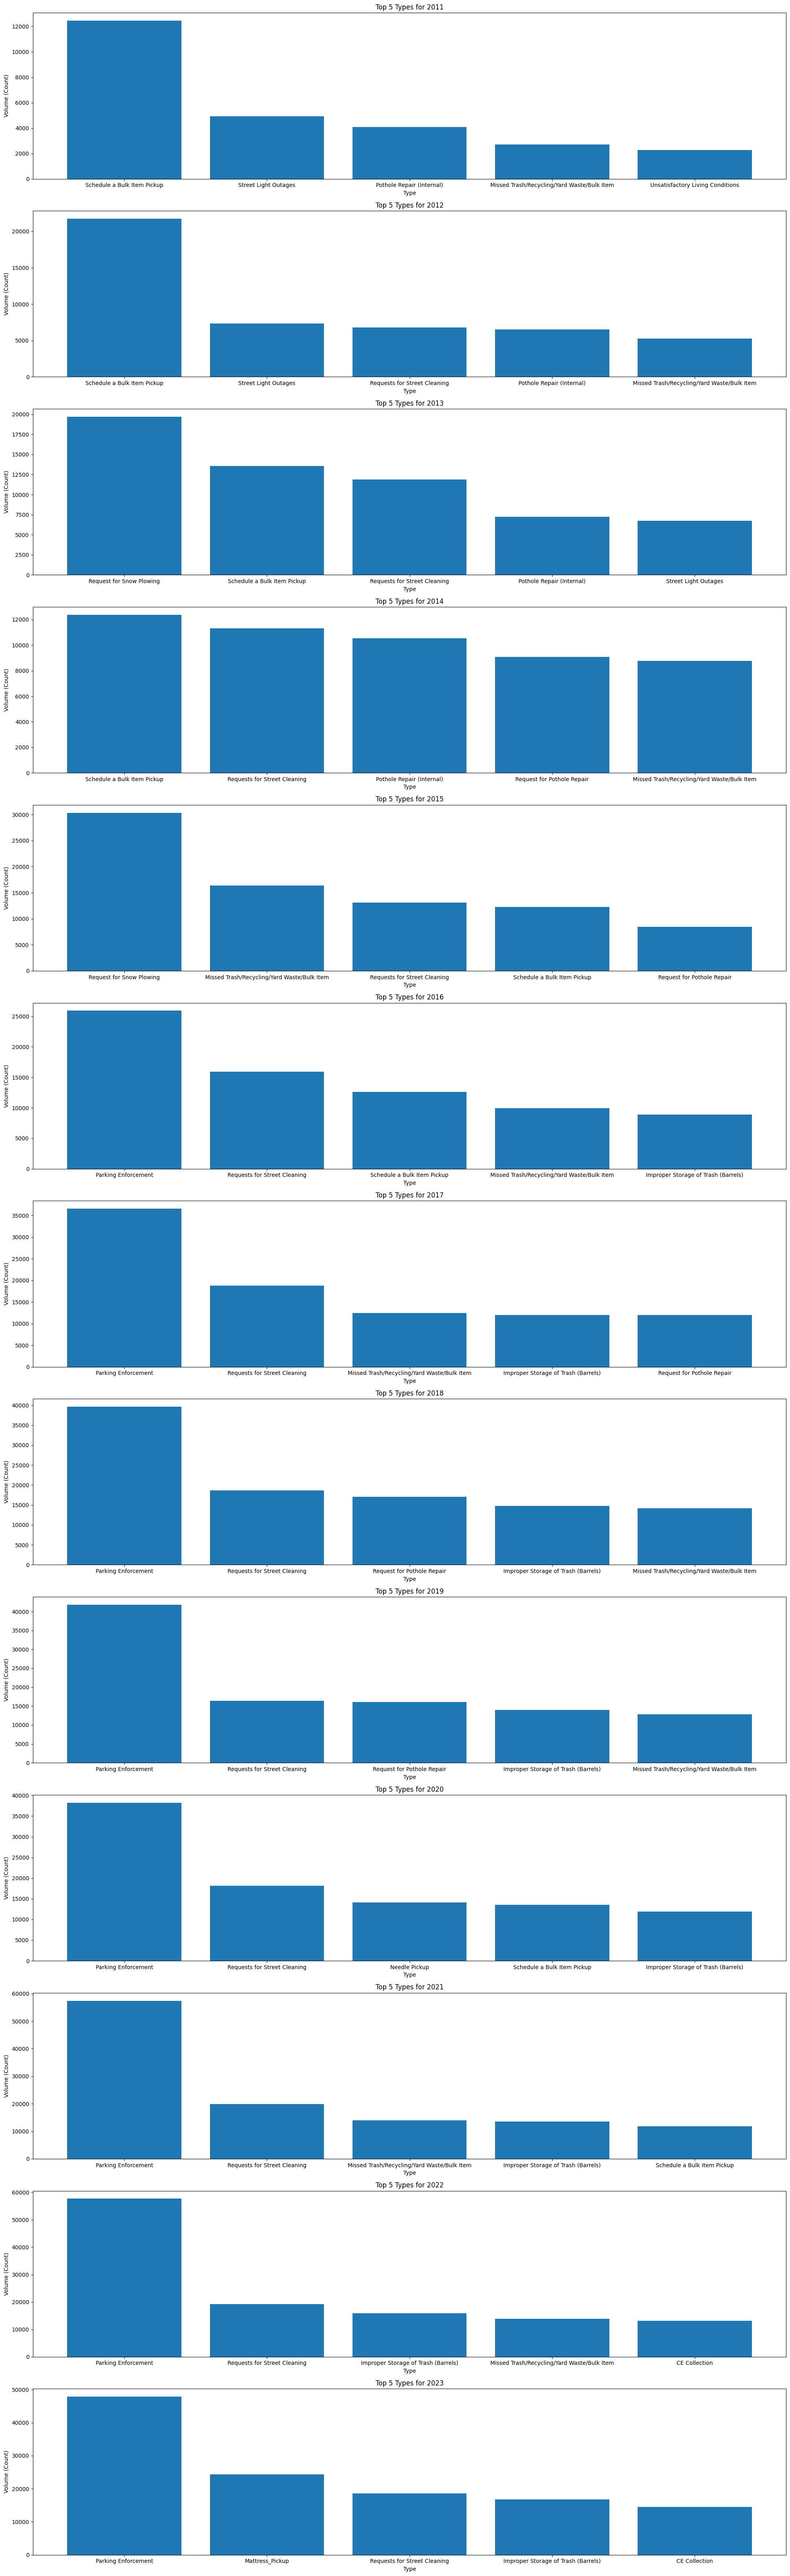

In [26]:
# Group by year and type, then count the occurrences
type_counts_per_year = dftype.groupby(['year', 'type']).size().reset_index(name='count')

# For each year, get the top 5 types
years = type_counts_per_year['year'].unique()
num_years = len(years)

fig, axes = plt.subplots(num_years, 1, figsize=(20, 5*num_years))

for i, year in enumerate(years):
    subset = type_counts_per_year[type_counts_per_year['year'] == year].nlargest(5, 'count')
    axes[i].bar(subset['type'], subset['count'])
    axes[i].set_title(f'Top 5 Types for {year}')
    axes[i].set_xlabel('Type')
    axes[i].set_ylabel('Volume (Count)')

plt.tight_layout()
plt.show()












### Check most common types and volumes regardless of year

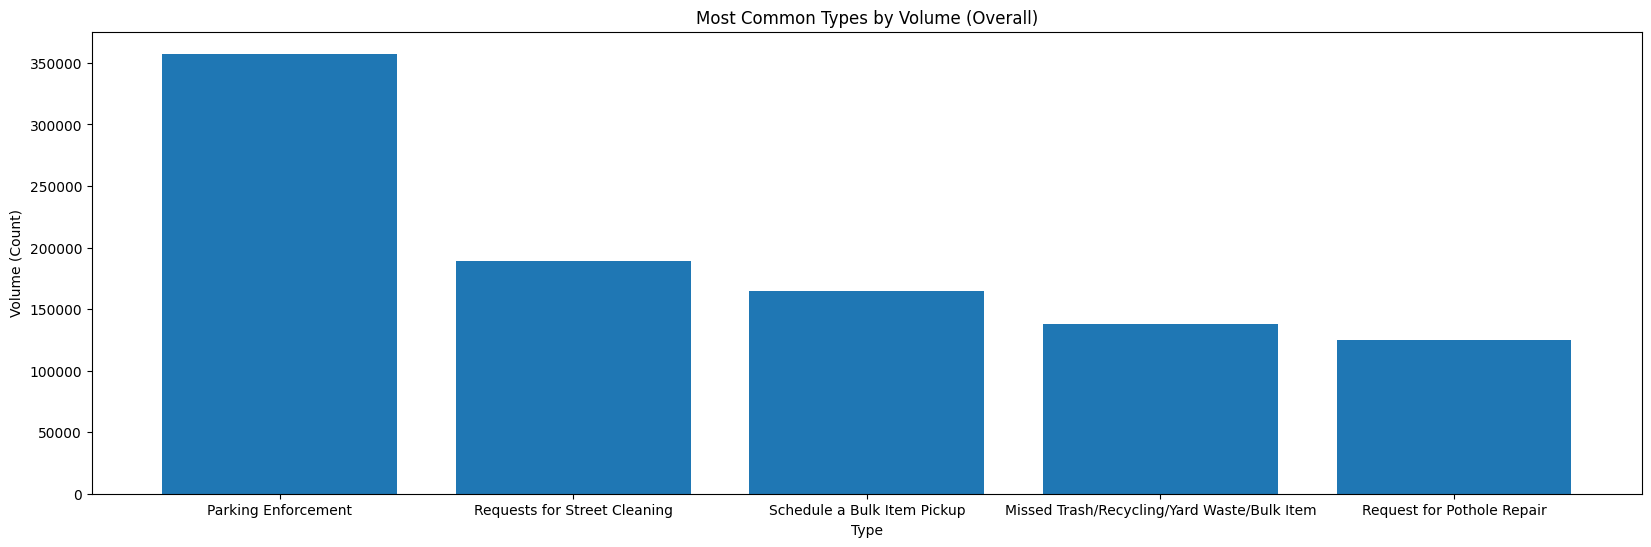

In [30]:
# Group by type and sum the counts
total_counts = dftype.groupby('type').size().reset_index(name='count')

# Sort by count in descending order
most_common_types_overall = total_counts.sort_values('count', ascending=False).head(5)

# Plotting the results
plt.figure(figsize=(20, 6))
plt.bar(most_common_types_overall['type'], most_common_types_overall['count'])
plt.xlabel('Type')
plt.ylabel('Volume (Count)')
plt.title('Most Common Types by Volume (Overall)')
plt.show()

### Top 5 growing types by year or year volume

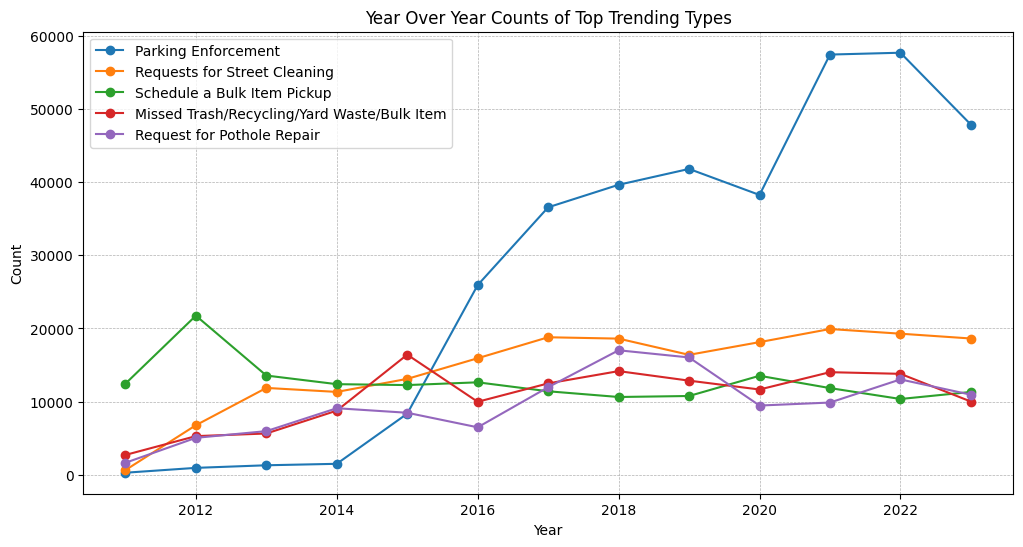

In [33]:
# Group by year and type, then count the occurrences
yearly_counts = dftype.groupby(['year', 'type']).size().reset_index(name='count')

# Identify the top trending types based on the increase in their counts year over year
# For simplicity, let's consider the top 5 types with the highest total count
top_types = yearly_counts.groupby('type')['count'].sum().nlargest(5).index

# Plotting the actual counts of these types over the years
plt.figure(figsize=(12, 6))

for type_ in top_types:
    subset = yearly_counts[yearly_counts['type'] == type_]
    plt.plot(subset['year'], subset['count'], label=type_, marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Over Year Counts of Top Trending Types')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()







### Conclusions and Analysis


You can see that year over year, the most common types of requests by volume stay the same and typically have to do with city issues. Additionally, we can see that, by far, the most common request is for parking issues which may lend insight to parking availability in Boston. Street cleaning, overall, came in at second for most requested and may give insight to cleanliness issues in Boston. What is very interesting is looking at the growth of request types over time. First, notice how much Parking Enforcement requests have grown since 2014. Also, notice the dip in request due to (assuming COVID) in 2020. Also, take a look at the spike in item pickup requests during 2020 (also assuming due to COVID). Overall, we can see interesting trends with the request types and this can lend insight to the most pressing issues to fix with 311 calls.